In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import scipy.stats as stats
from numbers import Number
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:

#donnees initiales
total_depense = 294900000000
total_retraites = 16900000

#Import du jeu de données des distributions des pensions
df = pd.read_csv("retraite_brut.csv", delimiter = ";")
df

,Montant\nde pension\n(en euros),Femmes,Hommes,Ensemble
0,De 0 à 100 euros,"2,48","4,73","3,56"
1,De 100 à 200 euros,"5,62","2,71","4,22"
2,De 200 à 300 euros,"6,31","1,65","4,07"
3,De 300 à 400 euros,"5,93","1,35","3,73"
4,De 400 à 500 euros,"5,05","1,12","3,17"
5,De 500 à 600 euros,"5,19","1,16","3,26"
6,De 600 à 700 euros,"5,49","1,40","3,52"
7,De 700 à 800 euros,"6,12","1,96","4,12"
8,De 800 à 900 euros,"7,48","3,56","5,60"
9,De 900 à 1000 euros,"5,77","3,71","4,78"


## Nettoyage du jeu de données

In [4]:
# Renommer la colonne pension
df.rename(columns={'Montant\nde pension\n(en euros)': 'pension_moyenne'}, inplace=True)


In [5]:
# Remplacer les virgules par des points pour les caster en float
def replace_commat(value):
    return value.replace(",", ".")
df = df.applymap(replace_commat)
df.head()

,pension_moyenne,Femmes,Hommes,Ensemble
0,De 0 à 100 euros,2.48,4.73,3.56
1,De 100 à 200 euros,5.62,2.71,4.22
2,De 200 à 300 euros,6.31,1.65,4.07
3,De 300 à 400 euros,5.93,1.35,3.73
4,De 400 à 500 euros,5.05,1.12,3.17


In [6]:
df.tail()

,pension_moyenne,Femmes,Hommes,Ensemble
41,De 4100 à 4200 euros,0.04,0.30,0.16
42,De 4200 à 4300 euros,0.04,0.25,0.14
43,De 4300 à 4400 euros,0.04,0.26,0.15
44,De 4400 à 4500 euros,0.03,0.23,0.12
45,Supérieur à 4500 euros,0.21,2.77,1.44


In [7]:
#Ajout de la colonne "nombre de personnes"

df["nombre_personnes"] = df.Ensemble.astype(float) * 0.01 * total_retraites

In [8]:
#Ajout de la colonne "dépense"
df["pension_moyenne" ] = list(range(50, 50 + 100 * 46, 100))
df["depense"] = df.pension_moyenne * df.nombre_personnes *12
df.pension_moyenne.iloc[-1] = ">4500"
df.tail()

C:\Users\maxim\AppData\Local\Temp\ipykernel_13092\785632462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pension_moyenne.iloc[-1] = ">4500"


,pension_moyenne,Femmes,Hommes,Ensemble,nombre_personnes,depense
41,4150,0.04,0.30,0.16,27040.0,1.346592e+09
42,4250,0.04,0.25,0.14,23660.0,1.206660e+09
43,4350,0.04,0.26,0.15,25350.0,1.323270e+09
44,4450,0.03,0.23,0.12,20280.0,1.082952e+09
45,>4500,0.21,2.77,1.44,243360.0,1.328746e+10


## Calcul de la pension moyenne des >4500 euros

In [9]:
#somme de toutes les pensions sauf les >4500 euros
depense_pauvre = sum(df["depense"][:-1])

print("Dépenses pour les pensions <4500 euros :", "{:,.0f}".format(depense_pauvre), "Euros")


Dépenses pour les pensions <4500 euros : 266,720,532,000 Euros


In [10]:
#calcul des dépenses pour les >4500 euros
depense_riche = total_depense - depense_pauvre
df["depense"].iloc[-1] = depense_riche

print("Dépenses pour les pensions >4500 euros :", "{:,.0f}".format(depense_riche), "Euros")

Dépenses pour les pensions >4500 euros : 28,179,468,000 Euros


C:\Users\maxim\AppData\Local\Temp\ipykernel_13092\502552960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["depense"].iloc[-1] = depense_riche


In [11]:
df.tail()

,pension_moyenne,Femmes,Hommes,Ensemble,nombre_personnes,depense
41,4150,0.04,0.30,0.16,27040.0,1.346592e+09
42,4250,0.04,0.25,0.14,23660.0,1.206660e+09
43,4350,0.04,0.26,0.15,25350.0,1.323270e+09
44,4450,0.03,0.23,0.12,20280.0,1.082952e+09
45,>4500,0.21,2.77,1.44,243360.0,2.817947e+10


In [13]:
nombre_personnes_riches = df.iloc[-1, 4]
pension_moyenne_riche = depense_riche/nombre_personnes_riches/12

print("Pension moyenne des riches:", "{:,.2f}".format(pension_moyenne_riche))

Pension moyenne des riches: 9,649.45


In [14]:
df.to_csv("csvForStreamlit.csv", index = False)

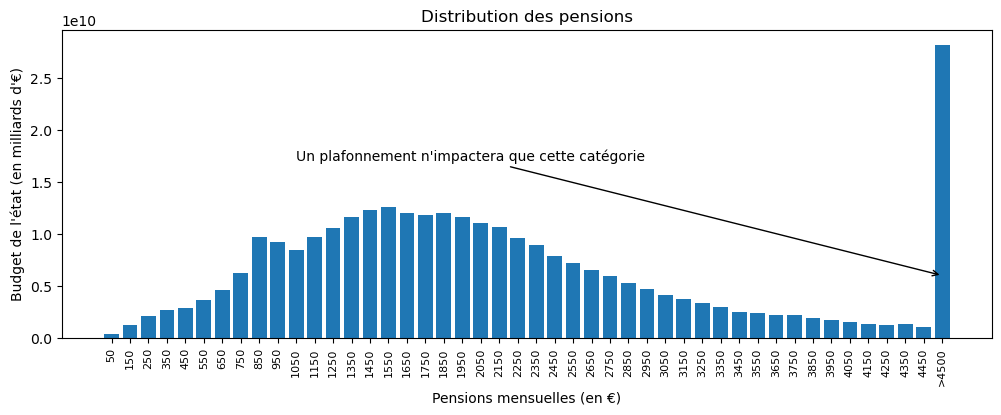

In [26]:
import matplotlib.pyplot as plt

df["pension_moyenne"] = df["pension_moyenne"].astype(str)

fig, ax = plt.subplots(figsize = (12,4))
ax.bar(df["pension_moyenne"], df["depense"])
ax.set_title("Distribution des pensions")
ax.annotate("Un plafonnement n'impactera que cette catégorie", xy=(45, 6000000000), xytext=(10, 17000000000),
             arrowprops=dict(facecolor='red', arrowstyle='->', shrinkA=0))
plt.xticks(rotation=90, fontsize=8)
ax.set_ylabel("Budget de l'état (en milliards d'€)")
ax.set_xlabel("Pensions mensuelles (en €)")
plt.show()


In [16]:
df_streamlit = pd.read_csv("csvForStreamlit.csv")
df_streamlit.tail()

,pension_moyenne,Femmes,Hommes,Ensemble,nombre_personnes,depense
41,4150,0.04,0.30,0.16,27040.0,1.346592e+09
42,4250,0.04,0.25,0.14,23660.0,1.206660e+09
43,4350,0.04,0.26,0.15,25350.0,1.323270e+09
44,4450,0.03,0.23,0.12,20280.0,1.082952e+09
45,>4500,0.21,2.77,1.44,243360.0,2.817947e+10


# Modélisation de la distribution des pensions riches

In [17]:
def trouver_alpha(alpha):
    """
    J'estime que la distribution suit une distribution de paréto
    Il nous manque le alpha qui détermine la forme de la courbe.
    Pour cela je vais utiliser plusieurs alphas et je regarde celui qui
    me donne la même moyenne des pensions des riches. A savoir 9649 euros.
    
    """
    min_salary = 4500
    max_salary = 22000
    num_people = 243360

    x = np.arange(min_salary, max_salary, 500)
    pareto = stats.pareto(alpha, scale=min_salary)
    pdf = pareto.pdf(x)
    pdf_normalized = pdf * (1 / np.sum(pdf))
    
    pareto_df = pd.DataFrame()
    pareto_df["proba"] = pdf_normalized
    pareto_df["nbre_personne"] = pareto_df["proba"]*num_people
    pareto_df["nbre_personne"] = round(pareto_df.nbre_personne).astype(int)
    pareto_df["salaire"] = x
    pareto_df["depense"] = pareto_df["nbre_personne"] * pareto_df["salaire"]
    
    return pareto_df["depense"].sum()/num_people

In [18]:
moyennes = []
alphas = []
for alpha in np.arange(0.1,20, 0.1):
    moyenne = trouver_alpha(alpha)
    moyennes.append(moyenne)
    alphas.append(alpha)

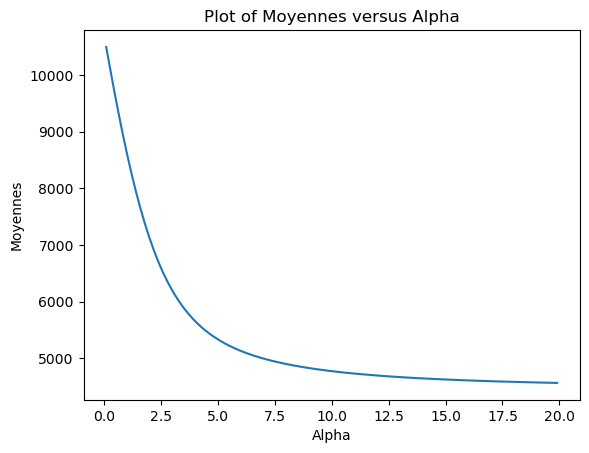

In [19]:
plt.plot(alphas, moyennes)
plt.xlabel('Alpha')
plt.ylabel('Moyennes')
plt.title('Moyennes Pensions riches versus Alpha')
plt.show()

In [20]:
pd.DataFrame({"alpha": alphas, "moyennes": moyennes}).head()

,alpha,moyennes
0,0.1,10495.611440
1,0.2,10271.585306
2,0.3,10050.571170
3,0.4,9833.608646
4,0.5,9620.915516


Je vois que le alpha correspondant à 9649 euros de moyenne le plus proches est 0.5.

### Distribution des pensions riches avec la distribution de pareto et le alpha = 0.5

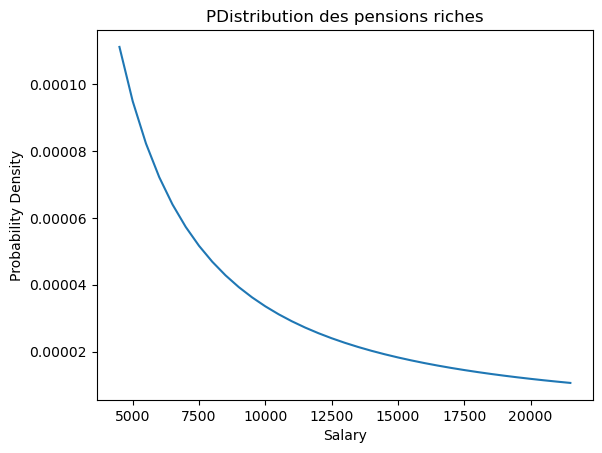

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

alpha = 0.5
min_salary = 4500
max_salary = 22000 #données de retraite.gouv


x = np.arange(min_salary, max_salary, 500)
pareto = stats.pareto(alpha, scale=min_salary)
pdf = pareto.pdf(x)
pdf_normalized = pdf * (1 / np.sum(pdf))


plt.plot(x, pdf)
plt.xlabel('Salary')
plt.ylabel('Probability Density')
plt.title('PDistribution des pensions riches')
plt.show()

## Calcul des économies réalisées en plafonnant

In [34]:
num_people = df.tail(1).nombre_personnes.sum()
print("Le nombre de retraités >4500€:", "{:.0f}".format(num_people))

Le nombre de retraités >4500€: 243360


In [23]:
pareto_df = pd.DataFrame()
pareto_df["proba"] = pdf_normalized
pareto_df["nbre_personne"] = pareto_df["proba"]*num_people
pareto_df["nbre_personne"] = round(pareto_df.nbre_personne).astype(int)
pareto_df["salaire"] = x
pareto_df["depense_annuel"] = pareto_df["nbre_personne"] * pareto_df["salaire"] *12
pareto_df.head()

,proba,nbre_personne,salaire,depense_annuel
0,0.096838,23566,4500,1272564000
1,0.082682,20121,5000,1207260000
2,0.071667,17441,5500,1151106000
3,0.062898,15307,6000,1102104000
4,0.055782,13575,6500,1058850000


In [24]:
def economie(plafond):
    """
    Ici je cherche a calculer les économies faites selon la retraite plafonnées
    Je calcule le nouveau salaire selon le plafond puis la nouvelle dépense engendrée
    Puis je calcule la différence entre la dépense initiale et la nouvelle dépense
    
    """
    pareto_df["salaire_plafonne"] = np.where(pareto_df['salaire'] > plafond, plafond, pareto_df['salaire'])
    pareto_df["depense_plafonnee_annuel"] = pareto_df["salaire_plafonne"] * pareto_df["nbre_personne"] *12
    pareto_df["economie"] = pareto_df["depense_annuel"]  - pareto_df["depense_plafonnee_annuel"]
    economie = pareto_df.economie.sum()
    print("economie", "{:,.0f}".format(economie))

In [25]:
economie(8000)

economie 7,793,958,000
